**PROJECT TEAM ID**: PTID-CDS-DEC-23-1715  
**PROJECT CODE**   : PRCP-1016-HeartDieseasePred   
**PROJECT NAME**   : Heart Disease Prediction

# Business Case

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.  

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.   

Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.  

Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.


# Domian Analysis

**patient_id:** Unique and random identifier  

**slope_of_peak_exercise_st_segment:** The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart   

**thal:** Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect  

**resting_blood_pressure:** resting blood pressure 

**chest_pain_type:** chest pain type (4 values)  

**num_major_vessels:** number of major vessels (0-3) colored by flourosopy  

**fasting_blood_sugar_gt_120_mg_per_dl:** fasting blood sugar > 120 mg/dl  

**resting_ekg_results:** resting electrocardiographic results (values 0,1,2)  

**serum_cholesterol_mg_per_dl:** serum cholestoral in mg/dl  

**oldpeak_eq_st_depression:** oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  

**sex:** 0: female, 1: male 

**age:** age in years  

**max_heart_rate_achieved:** maximum heart rate achieved (beats per minute) 

**exercise_induced_angina:** exercise-induced chest pain (0: False, 1: True)  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('values.csv')

In [3]:
data2 = pd.read_csv('labels.csv')

In [4]:
df = pd.concat([data1,data2.drop('patient_id',axis=1)],axis=1)

In [5]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## Basic Checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [8]:
df.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [9]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

## Exploratory Data Analyis

### Univariate Analysis

In [10]:
for i in df:
    if len(df[i].unique())<=20:
        print(df[i].value_counts())
        print('**********************************************************')

slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
**********************************************************
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64
**********************************************************
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
**********************************************************
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
**********************************************************
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
**********************************************************
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
**********************************************************
sex
1    124
0     56
Name: count, dtype: int64
**********************************************************
exercise_induced_angina
0    123
1     57
Name:

In [11]:
df_cate =[]
for i in df:
    if len(df[i].unique())<=20:
        df_cate.append(i)
df_cate

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [12]:
# Categerical Data 
d1 = df[df_cate]
d1

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,1,normal,2,0,0,2,1,0,0
1,2,normal,3,0,0,0,0,0,0
2,1,normal,4,3,0,2,1,1,1
3,1,reversible_defect,4,0,0,0,1,0,1
4,3,reversible_defect,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0,1
176,2,normal,4,0,0,1,0,1,1
177,2,reversible_defect,3,0,0,0,1,1,1
178,1,normal,3,2,1,0,1,0,0


In [13]:
# Numerical Data
d2 = df.drop(df_cate,axis=1)
d2

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0z64un,128,308,0.0,45,170
1,ryoo3j,110,214,1.6,54,158
2,yt1s1x,125,304,0.0,77,162
3,l2xjde,152,223,0.0,40,181
4,oyt4ek,178,270,4.2,59,145
...,...,...,...,...,...,...
175,5qfar3,125,254,0.2,67,163
176,2s2b1f,180,327,3.4,55,117
177,nsd00i,125,309,1.8,64,131
178,0xw93k,124,255,0.0,48,175


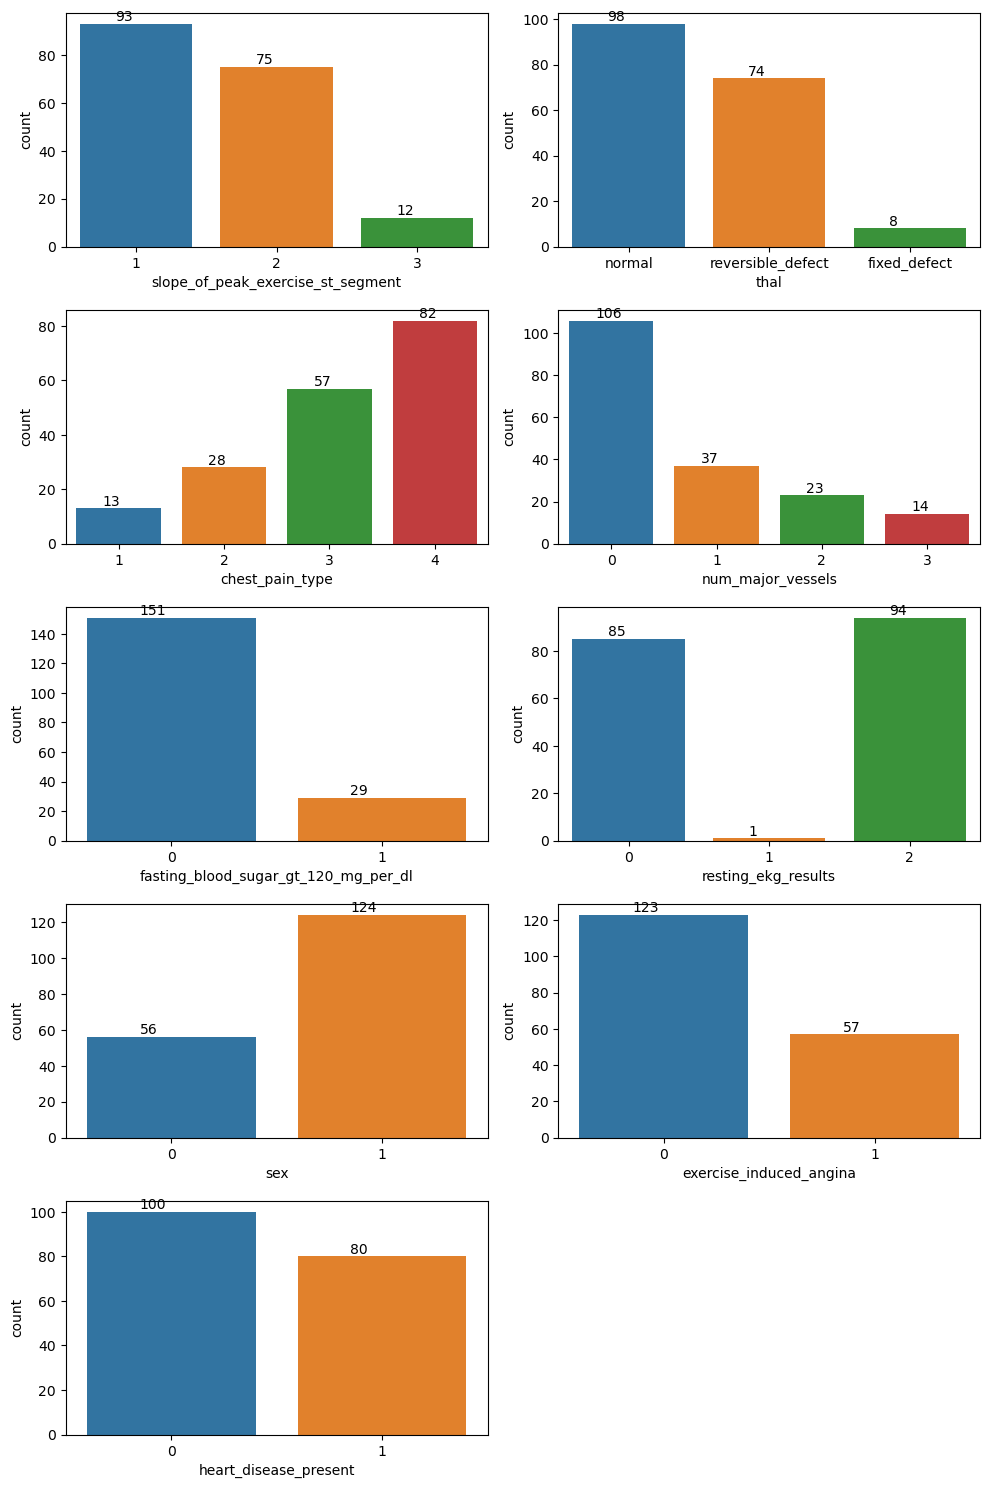

In [14]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i])
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insigths

* 52% of the patients done one time of slope of peak exercise ST segment.
* 54% of the patients is normal and 4% of the patients is fixed defect of the thal.
* Almost 48% of the patients is 4 type of chest pain.
* 60% of the patients are zero vessels colred by  flourosopy.
* More than 20% of the people fasting blood sugar greaterthan 120 mg per dl.
* 52% of the patients two resting electrocardiographic results.
* 70% of the patients is male.
* 32% of the exercise-induced chest pain.
* 44% of the patient are not their heart diseases present.

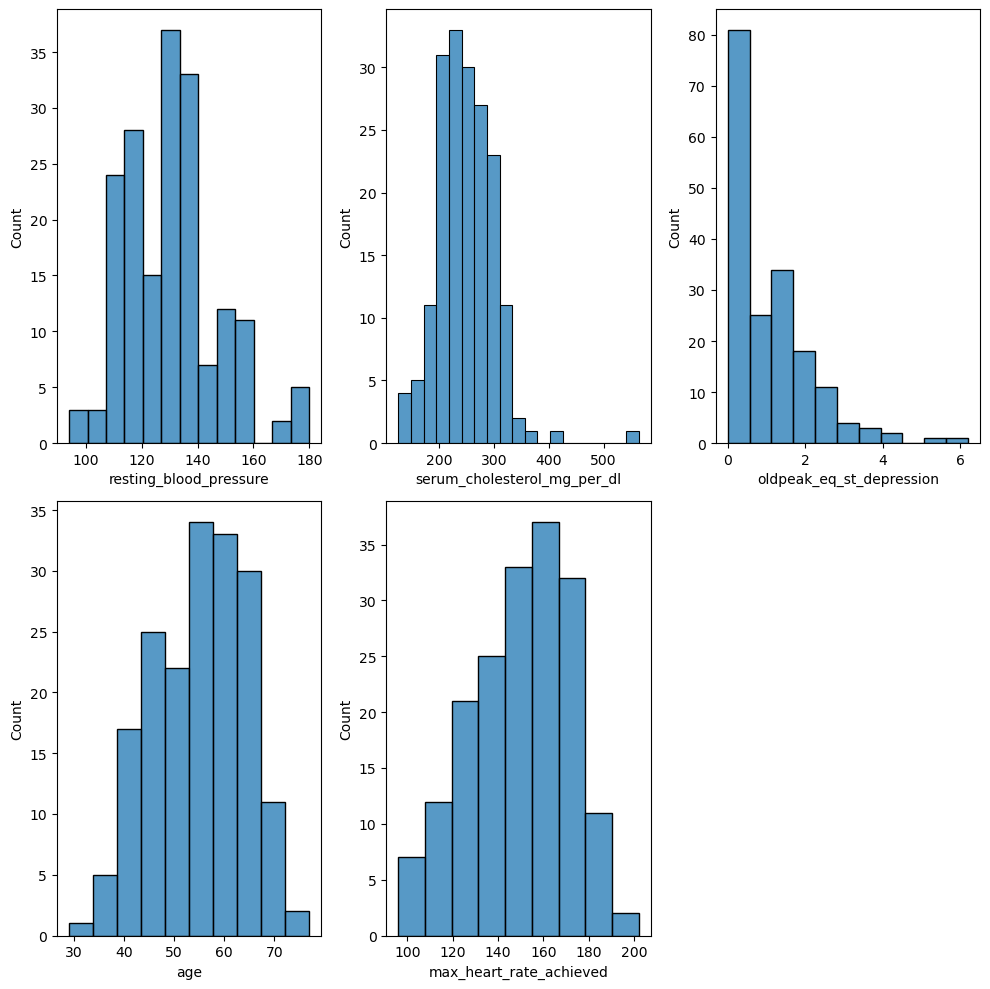

In [15]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

### Insigths

* More than 50% of the patients resting blood pressure range is 120 to 160.
* More than 70% of the patients serum chelesterol mg per dl range in between is 180 to 280.
* Most of the patients is zero old peak ST depression induced by exercise relative to rest.
* Majority patients age group between is 40 to 65.
* Majority patients max heart rate achived is 120 to 180.

### Bivariate Anaylsis

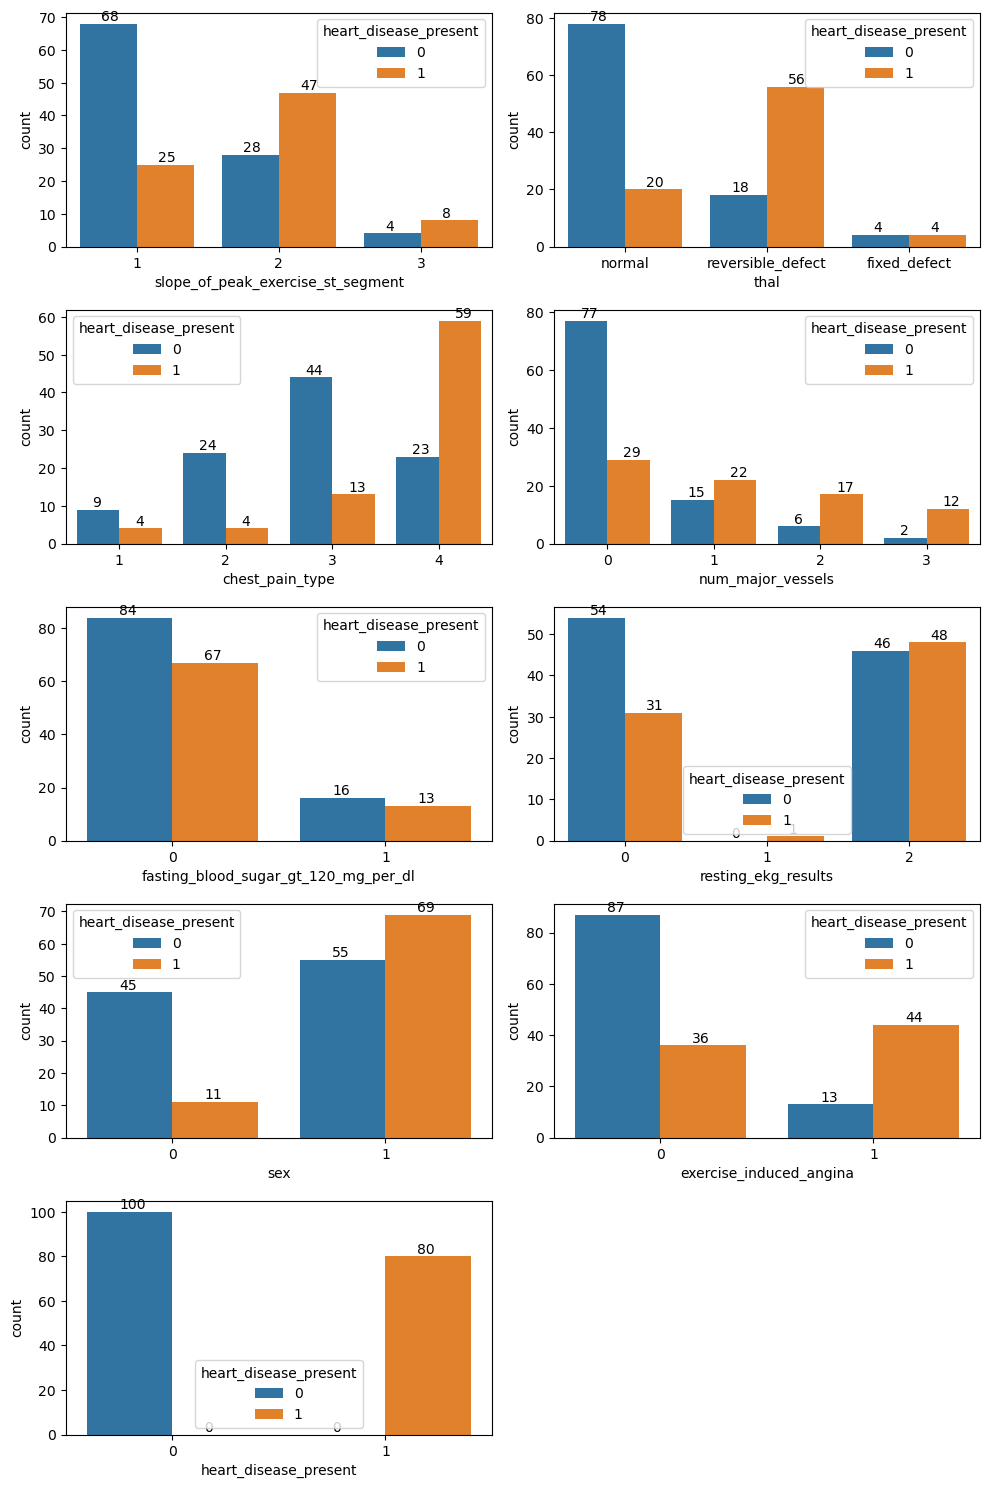

In [16]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i],hue=df.heart_disease_present)
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.15,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insigths

* Most patients done two time of slope of peak exercise ST segment got Heart diseases present.
* Most patients reversible defect thal as got Heart diseases present.
* Almost 48% of the patients is 4 type of chest pain and most Heart diseases present.
* The patients are two vessels colred by  flourosopy and most Heart diseases present.
* The patients two resting electrocardiographic results and most got Heart diseases present.
* 70% of the patients is male and most Heart diseases present.
* 32% of the exercise induced chest pain and Heart diseases present.
* 44% of the patient are not their heart diseases present.

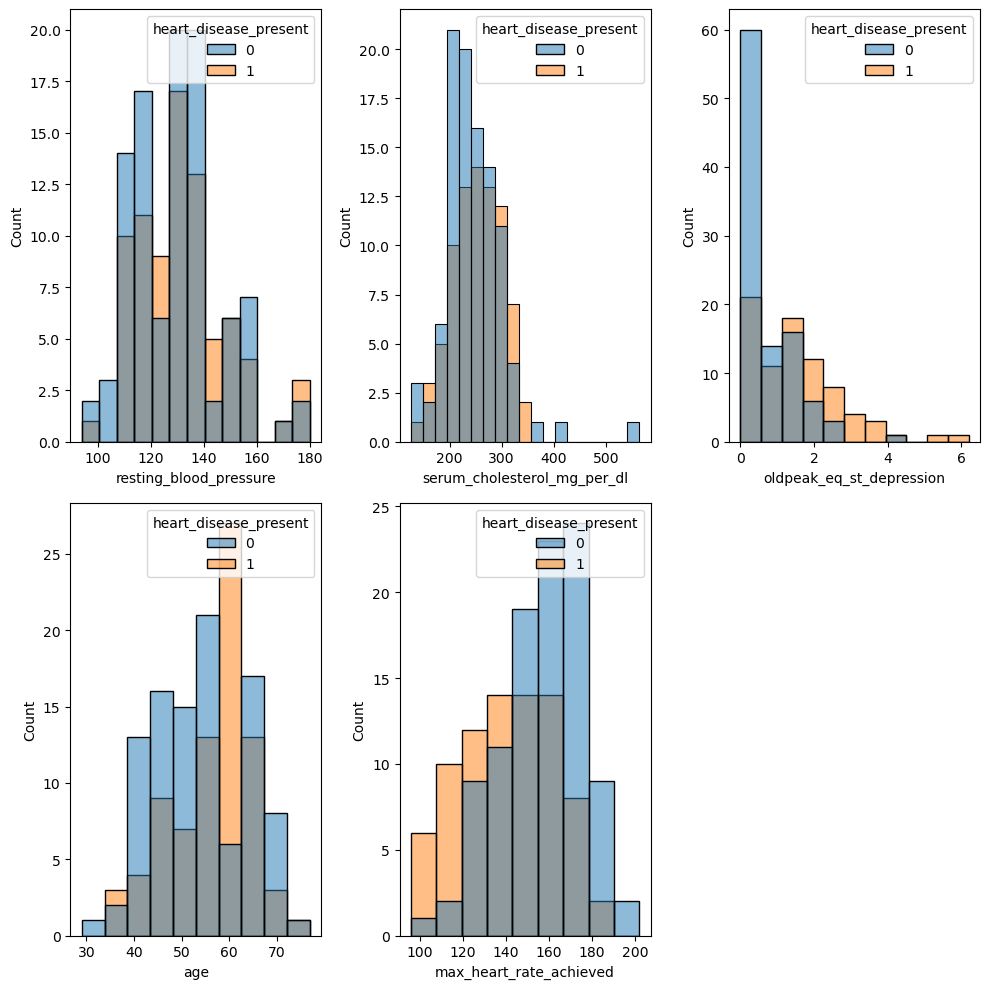

In [17]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i],hue=df.heart_disease_present)
    plotnumber+=1
plt.tight_layout()

### Insigths

* More than 50% of the patients resting blood pressure range is 120 to 160 and most got heart diseases present.
* More than 70% of the patients serum chelesterol mg per dl most got heart present diseases.
* Most of the patients is zero old peak ST depression induced by exercise relative to rest and not heart diseases present.
* Majority patients max heart rate achived is 100 to 160 and heart diseases present.

# Data Preprocessing

### Handling With Null Values

In [18]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

### Handling With Outlayers

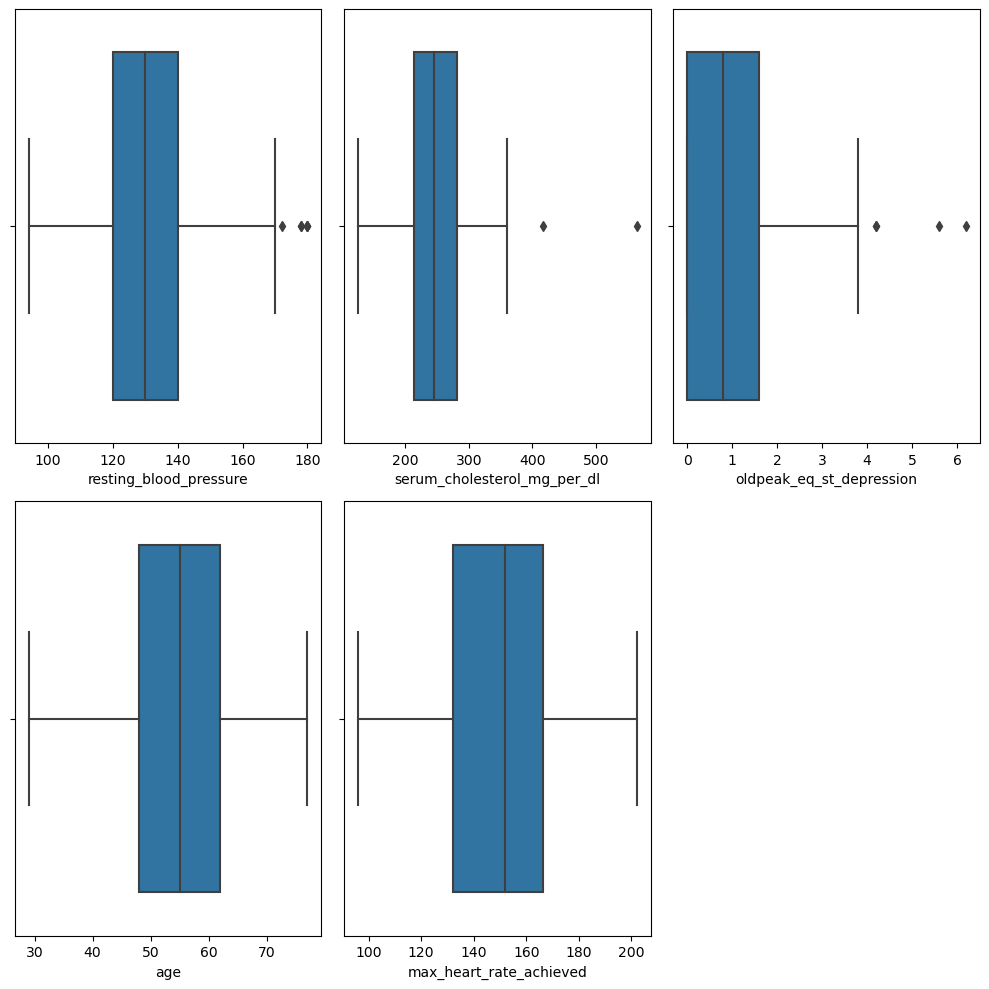

In [19]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

#### resting_blood_pressure

In [20]:
min_rbp = np.mean(df.resting_blood_pressure) - 2.7*np.std(df.resting_blood_pressure)
min_rbp

85.51067006519976

In [21]:
max_rbp = np.mean(df.resting_blood_pressure) + 2.7*np.std(df.resting_blood_pressure)
max_rbp

177.11155215702246

In [22]:
df.loc[(df.resting_blood_pressure>max_rbp)|(df.resting_blood_pressure<min_rbp),
         'resting_blood_pressure'] = np.median(df.resting_blood_pressure)

<Axes: xlabel='resting_blood_pressure'>

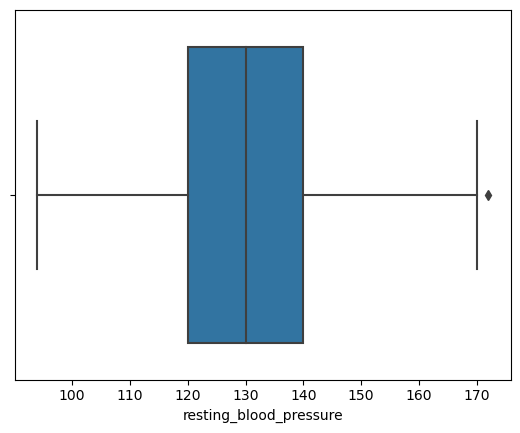

In [23]:
sns.boxplot(x = df.resting_blood_pressure)

##### serum_cholesterol_mg_per_dl

In [24]:
max_rbp = np.mean(df.serum_cholesterol_mg_per_dl) + 2.7*np.std(df.serum_cholesterol_mg_per_dl)
max_rbp

391.15369140328414

In [25]:
max_rbp = np.mean(df.serum_cholesterol_mg_per_dl) + 2.7*np.std(df.serum_cholesterol_mg_per_dl)
max_rbp

391.15369140328414

In [26]:
df.loc[(df.serum_cholesterol_mg_per_dl>max_rbp)|(df.serum_cholesterol_mg_per_dl<min_rbp),
         'serum_cholesterol_mg_per_dl'] = np.median(df.serum_cholesterol_mg_per_dl)

<Axes: >

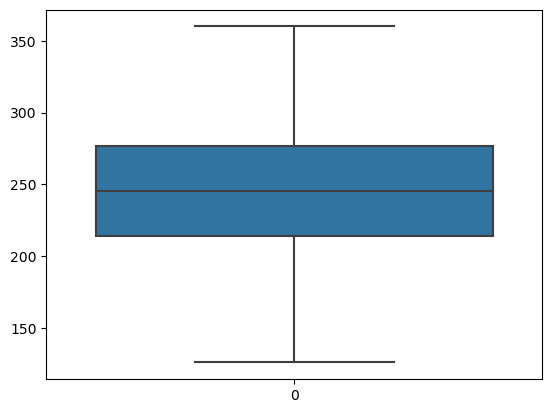

In [27]:
sns.boxplot(df.serum_cholesterol_mg_per_dl)

#### oldpeak_eq_st_depression

In [28]:
max_rbp = np.mean(df.oldpeak_eq_st_depression) + 2.7*np.std(df.oldpeak_eq_st_depression)
max_rbp

4.029241792238576

In [29]:
df.loc[df.oldpeak_eq_st_depression>max_rbp,'oldpeak_eq_st_depression'] = np.median(df.oldpeak_eq_st_depression)

<Axes: xlabel='oldpeak_eq_st_depression'>

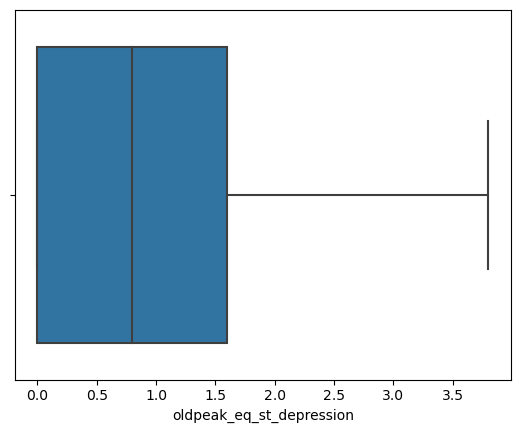

In [30]:
sns.boxplot(x = df.oldpeak_eq_st_depression)

## Convert Categerical data to Numerical data

In [31]:
df.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [32]:
df.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [33]:
df.loc[df.thal == 'normal','thal'] = 2
df.loc[df.thal == 'reversible_defect','thal'] = 1
df.loc[df.thal == 'fixed_defect','thal'] = 0

In [34]:
df.thal.value_counts()

2    98
1    74
0     8
Name: thal, dtype: int64

In [35]:
df['thal'] = df.thal.astype(np.int64)

## Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mn = MinMaxScaler()

In [38]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2s2b1f,2,2,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,nsd00i,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,0xw93k,1,2,124,3,2,1,0,255.0,0.0,1,48,175,0,0


In [39]:
df.resting_blood_pressure = mn.fit_transform(df[['resting_blood_pressure']])

In [40]:
df.resting_blood_pressure

0      0.435897
1      0.205128
2      0.397436
3      0.743590
4      0.461538
         ...   
175    0.397436
176    0.461538
177    0.397436
178    0.384615
179    0.846154
Name: resting_blood_pressure, Length: 180, dtype: float64

In [41]:
df.serum_cholesterol_mg_per_dl = mn.fit_transform(df[['serum_cholesterol_mg_per_dl']])

In [42]:
df.age = mn.fit_transform(df[['age']])

In [43]:
df.max_heart_rate_achieved = mn.fit_transform(df[['max_heart_rate_achieved']])

## Feature Selection 

In [44]:
d2.drop('patient_id',axis=1).corr()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
resting_blood_pressure,1.000000,0.144881,0.219026,0.284402,-0.017521
serum_cholesterol_mg_per_dl,0.144881,1.000000,-0.021932,0.236211,-0.071038
oldpeak_eq_st_depression,0.219026,-0.021932,1.000000,0.189700,-0.341045
age,0.284402,0.236211,0.189700,1.000000,-0.394630
max_heart_rate_achieved,-0.017521,-0.071038,-0.341045,-0.394630,1.000000


<Axes: >

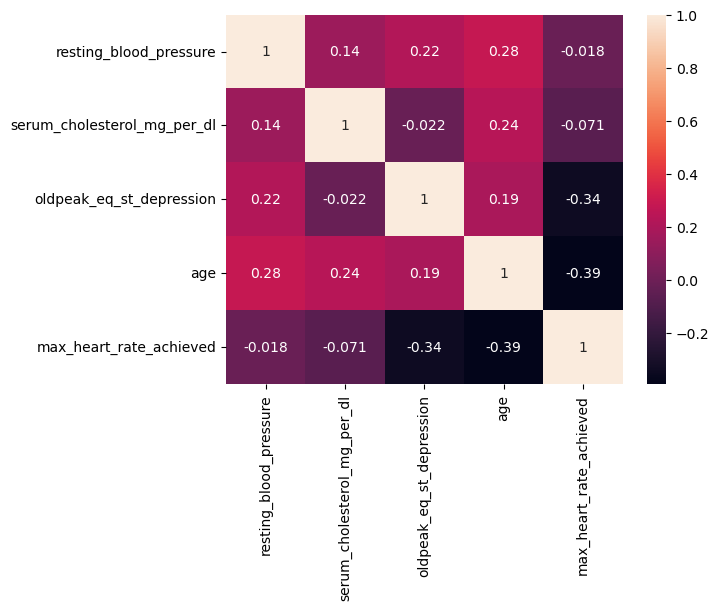

In [45]:
sns.heatmap(d2.drop('patient_id',axis=1).corr(),annot=True)

# Model Ceration

In [46]:
x = df.drop(['patient_id','heart_disease_present'],axis=1)
y = df.heart_disease_present

In [47]:
x.shape

(180, 13)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
y_train.value_counts()

0    81
1    54
Name: heart_disease_present, dtype: int64

In [51]:
y_test.value_counts()

1    26
0    19
Name: heart_disease_present, dtype: int64

## Balacing 

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE()

In [54]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [55]:
y_sm.value_counts()

0    81
1    81
Name: heart_disease_present, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

### Logistic Regression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(x_sm,y_sm)

LogisticRegression()

In [59]:
y_predit_lr = lr.predict(x_test)
y_predit_lr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [60]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



In [61]:
y_predit_lr_train = lr.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_lr_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_lr_train))

Train Score

accuracy_score 0.8740740740740741 

classification_report
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        81
           1       0.80      0.91      0.85        54

    accuracy                           0.87       135
   macro avg       0.87      0.88      0.87       135
weighted avg       0.88      0.87      0.88       135



### SVM

In [62]:
svm = SVC()

In [63]:
svm.fit(x_sm,y_sm)

SVC()

In [64]:
y_predit_svm = svm.predict(x_test)
y_predit_svm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [65]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.8888888888888888 

classification_report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.81      0.89        26

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



In [66]:
y_predit_svm_train = svm.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_svm_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_svm_train))

Train Score

accuracy_score 0.8888888888888888 

classification_report
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.84      0.89      0.86        54

    accuracy                           0.89       135
   macro avg       0.88      0.89      0.89       135
weighted avg       0.89      0.89      0.89       135



### KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
y_predit_knn = knn.predict(x_test)
y_predit_knn 

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [70]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_knn),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_knn))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



In [71]:
y_predit_knn_train = knn.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_knn_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_knn_train))

Train Score

accuracy_score 0.8666666666666667 

classification_report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        81
           1       0.89      0.76      0.82        54

    accuracy                           0.87       135
   macro avg       0.87      0.85      0.86       135
weighted avg       0.87      0.87      0.86       135



## Decision Tree 

In [72]:
dt = DecisionTreeClassifier(random_state=42)

In [73]:
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(random_state=42)

In [74]:
y_predit_dt = dt.predict(x_test)
y_predit_dt

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1], dtype=int64)

In [75]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.7777777777777778 

classification_report
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.81      0.81      0.81        26

    accuracy                           0.78        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45



In [76]:
y_predit_dt_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_dt_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_dt_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Bagging using Decision Tree

In [77]:
model_bagg = BaggingClassifier(base_estimator=dt, n_estimators=30,random_state=15)

model_bagg.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=30, random_state=15)

In [78]:
y_predit_bagg = model_bagg.predict(x_test)

In [79]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_bagg),'\n')
print('classification_report\n',classification_report(y_test,y_predit_bagg))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



In [80]:
y_predit_bagg_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_bagg_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_bagg_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Random Forest 

In [81]:
rf = RandomForestClassifier(n_estimators=200,random_state=52)

In [82]:
rf.fit(x_sm,y_sm)

RandomForestClassifier(n_estimators=200, random_state=52)

In [83]:
y_predit_rf = rf.predict(x_test)
y_predit_rf

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [84]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [85]:
y_predit_rf_train = rf.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_rf_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_rf_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning using Random Forest

In [86]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [87]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)


In [88]:
grid_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=52),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [89]:
grid_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [90]:
rf_hyp = RandomForestClassifier( n_estimators = 800,
  min_samples_split = 5,
  min_samples_leaf = 1,
  max_features =  'auto' ,
  max_depth = 10,
  bootstrap = False)

In [91]:
rf_hyp.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                       min_samples_split=5, n_estimators=800)

In [92]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [93]:
rf_hyp_train = rf_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,rf_hyp_train),'\n')
print('classification_report\n',classification_report(y_train,rf_hyp_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Gradient Boosting

In [94]:
gb = GradientBoostingClassifier()

In [95]:
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [96]:
y_predit_gb = gb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_gb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_gb))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [97]:
y_predit_gb_train = gb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_gb_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_gb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## XGBoost

In [98]:
xgb = XGBClassifier()

In [102]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



In [113]:
xgb_train = xgb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning XGBoost

In [105]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [106]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [107]:
random_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [108]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [109]:
xgb_hyp = XGBClassifier(subsample = 0.8,
  n_estimators = 200,
  min_child_weight = 1,
  max_depth = 4,
  learning_rate = 0.01,
  gamma = 0,
  colsample_bytree = 1.0)

In [110]:
xgb_hyp.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8 

classification_report
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



In [116]:
xgb_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 0.9851851851851852 

classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.96      0.98        54

    accuracy                           0.99       135
   macro avg       0.99      0.98      0.98       135
weighted avg       0.99      0.99      0.99       135



# Conclusions

In [120]:
models=['LogisticRegression','KNN','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_predit_lr),accuracy_score(y_test,y_predit_knn),accuracy_score(y_test,y_predit_svm),accuracy_score(y_test,y_predit_dt),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_bagg),accuracy_score(y_test,y_predit_xgb_hyp)]

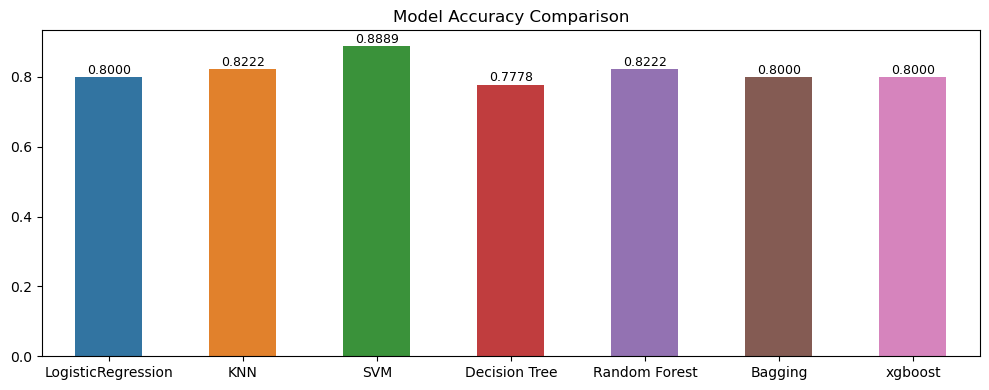

In [121]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Using Random SVM we achieved almost similar accuracy score i.e, above 88%, meaning that we are actually able to predict values quite near to the actual prices for majority of the rows.

So we can use one predictive models, SVM giving the highest performance, for production to solve our problem in predicting the 
Heart diseases.

## Recommendations to the Hospital for Heart Disease Prevention

#### 1. Risk Factors Analysis:

Identify and analyze the most significant risk factors contributing to the occurrence of heart diseases based on the insights derived from the data analysis and machine learning model. Understand the relationships between various features and the likelihood of heart diseases.

#### 2. Early Detection Strategies:

Propose strategies for early detection of potential heart diseases in individuals. This could involve leveraging the identified high-risk factors to create targeted screening programs or regular check-ups for patients with specific risk profiles.

#### 3. Patient Education:

Suggest educational programs and materials for patients to raise awareness about heart health. Provide information on lifestyle changes, dietary habits, and the importance of regular health check-ups to empower individuals to take proactive measures for heart disease prevention.

#### 4. Integration of Predictions into Healthcare System:

Recommend integrating the developed machine learning model into the hospital's healthcare system. This allows for real-time predictions and risk assessments, enabling healthcare professionals to make timely and informed decisions during patient interactions.

#### 5. Continuous Monitoring:

Emphasize the importance of continuous monitoring of the model's performance. Regularly update the model with new data to ensure its accuracy and relevance over time. Establish protocols for model maintenance and retraining to adapt to evolving trends in heart disease risk factors.

#### 6. Collaboration with Health Professionals:

Encourage collaboration between data scientists and healthcare professionals. Foster a multidisciplinary approach that combines data-driven insights with the expertise of medical professionals. This collaboration ensures a comprehensive and holistic strategy for heart disease prevention and patient care.

#### 7. Community Engagement:

Suggest community engagement initiatives to promote heart health at a broader level. Organize awareness campaigns, workshops, or seminars to reach a wider audience and encourage community members to adopt heart-healthy lifestyles.

#### 8. Feedback Mechanism:

Establish a feedback mechanism for healthcare professionals to provide insights into the practical application of the model. Gather feedback on the model's effectiveness in clinical settings and use this information to make continuous improvements.

#### 9. Regulatory Compliance:

Ensure that the implementation of the predictive model complies with relevant healthcare regulations and data privacy standards. Prioritize patient confidentiality and data security in the integration process.

#### 10. Evaluation and Adjustment:

Define metrics for evaluating the success of the heart disease prevention strategies. Regularly assess the impact of implemented measures and be prepared to adjust the approach based on ongoing evaluations and feedback.

By addressing these aspects, the hospital can develop a comprehensive and effective strategy for preventing heart diseases, combining data-driven insights with practical healthcare solutions.